In [6]:
from scipy import signal
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import simps
import csv
from itertools import zip_longest


def CheckCorrelation(User,Band,Label):
    file_path = os.path.join("ChannelsExtracted",User, Label+".csv")
    data = np.loadtxt(fname=file_path)
    print(np.corrcoef(data, Band))
    


#For OneUser And A certain periodExtractChannels

def ExtractTrialByUserAndPeriod(TrialNumber,UserName,WelchWindow,StartTime=0,EndTime=63):
    AllChannels=[]
    ChannelsPath=str(StartTime)+str(EndTime)+"/" 
    WholeCsv = np.genfromtxt("ChannelsExtracted/"+UserName+"/"+ChannelsPath+"/t"+str(TrialNumber)+"featuresraw.csv", delimiter=",")
    for Channel in range(32):
        data = WholeCsv[:,Channel]
#         print(data)
        AllChannels+=ExtractAllBands(data,WelchWindow)
    return AllChannels;
    
    
def ExtractAllTrialsByUserAndPeriod(UserName,WelchWindow,StartTime=0,EndTime=63):
    AllChannels=[]
    for TrialNumber in range(40):
        AllChannels+=[ExtractTrialByUserAndPeriod(TrialNumber,UserName,WelchWindow,StartTime,EndTime)]
        WriteExtraction(UserName,WelchWindow,StartTime,EndTime,AllChannels)
    return AllChannels;

import pandas
import csv
def WriteExtraction(UserName,WelchWindow,StartTime,EndTime,AllChannels):
    try:  
        os.mkdir("training/"+str(StartTime)+str(EndTime))
    except OSError:  
        print ("Creation of the directory  failed")
    else:  
        print ("Successfully created the directory ")
    with open('training/'+str(StartTime)+str(EndTime)+'/'+str(WelchWindow)+UserName+'.csv', 'w', newline='') as f:
        writer = csv.writer(f, delimiter=',')
        writer.writerows(AllChannels)

def ExtractAllUsersByPeriodAndWindow(WelchWindow,StartTime,EndTime):
        for i in range(32): 
            if(i%1 == 0):
                if i < 10:
                    name = '%0*d' % (2,i+1)
                else:
                    name = i+1
            ExtractAllTrialsByUserAndPeriod("s"+str(name),WelchWindow,StartTime,EndTime)
        
    

def ExtractAllBands(OneChannel,WelchWindow):
    #Data , Sampling rate 128 , Window
    AbsoluteBandArray=[]
    # Extract Theta
    freqs, psd = signal.welch(OneChannel, 128, nperseg=WelchWindow)
    idx_Theta = np.logical_and(freqs >= 3, freqs <= 7)
    freq_res = freqs[1] - freqs[0] 
    # Compute the absolute power by approximating the area under the curve
    Theta_power = simps(psd[idx_Theta], dx=freq_res)    
    total_power = simps(psd, dx=freq_res)
    delta_rel_power =Theta_power / total_power
    
# Plot the power spectrum
    sns.set(font_scale=1.2, style='white')
    plt.figure(figsize=(8, 4))
    plt.plot(freqs, psd, color='k', lw=2)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power spectral density (V^2 / Hz)')
    plt.ylim([0, psd.max() * 1.1])
    plt.title("Welch's periodogram ")
    plt.xlim([0, freqs.max()])
    sns.despine()
# Find intersecting values in frequency vector
    idx_delta = np.logical_and(freqs >= 3, freqs <= 7)
#         Plot the power spectral density and fill the delta area
    plt.figure(figsize=(7, 4))
    plt.plot(freqs, psd, lw=2, color='k')
    plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power spectral density (uV^2 / Hz)')
    plt.ylim([0, psd.max() * 1.1])
    plt.title("Welch's periodogram Theta ")
    sns.despine()
    
    # Extract Alpha
    freqs, psd = signal.welch(OneChannel, 128, nperseg=WelchWindow)
    idx_Alpha = np.logical_and(freqs >= 8, freqs <= 13)
    freq_res = freqs[1] - freqs[0] 
    # Compute the absolute power by approximating the area under the curve
    Alpha_power = simps(psd[idx_Alpha], dx=freq_res)    
    total_power = simps(psd, dx=freq_res)
    delta_rel_power =Theta_power / total_power
    
    # Extract Beta
    freqs, psd = signal.welch(OneChannel, 128, nperseg=WelchWindow)
    idx_Beta = np.logical_and(freqs >= 14, freqs <= 29)
    freq_res = freqs[1] - freqs[0] 
    # Compute the absolute Beta power by approximating the area under the curve
    Beta_power = simps(psd[idx_Beta], dx=freq_res)    
    total_power = simps(psd, dx=freq_res)
    delta_rel_power =Theta_power / total_power
    
    # Extract Gamma
    freqs, psd = signal.welch(OneChannel, 128, nperseg=WelchWindow)
    idx_Gamma = np.logical_and(freqs >= 30, freqs <= 47)
    freq_res = freqs[1] - freqs[0] 
    # Compute the absolute Gamma power by approximating the area under the curve
    Gamma_power = simps(psd[idx_Gamma], dx=freq_res)    
    total_power = simps(psd, dx=freq_res)
    delta_rel_power =Theta_power / total_power
    
    AbsoluteBandArray.append(Theta_power)
    AbsoluteBandArray.append(Alpha_power)
    AbsoluteBandArray.append(Beta_power)
    AbsoluteBandArray.append(Gamma_power)
    return AbsoluteBandArray;



def ExtractByNumberAndWindowAndPeriod(low , high , UserName,Channel,win):
    AbsoluteBandArray=[]
    for i in range(40):
        WholeCsv = np.genfromtxt("ChannelsExtracted/s01/"+str(i)+"featuresraw.csv", delimiter=",")
        data = WholeCsv[:,Channel]
        freqs, psd = signal.welch(data, window=win, nperseg=win)
        idx_delta = np.logical_and(freqs >= low, freqs <= high)
        freq_res = freqs[1] - freqs[0] 
        # Compute the absolute power by approximating the area under the curve
        delta_power = simps(psd[idx_delta], dx=freq_res)
        AbsoluteBandArray.append(delta_power)
        total_power = simps(psd, dx=freq_res)
        delta_rel_power = delta_power / total_power
    return AbsoluteBandArray;
 
def AllUsersFeature(low,high,Channel):
    AbsoluteBandArrays=[[]]
    for i in range(32):
        if i < 10:
             name = '%0*d' % (2,i+1)
        else:
             name = i+1
        AbsoluteBandArrays += [ExtractFeature(low , high , "s"+str(name),Channel)]
        
def UserOneChannelAllBands(UserName,ChannelNumber,Window):
    AbsoluteTheta=ExtractByNumberAndWindow(3 , 7 , UserName,ChannelNumber,Window)
    AbsoluteAlpha=ExtractByNumberAndWindow(8 , 13 , UserName,ChannelNumber,Window)
    AbsoluteBeta=ExtractByNumberAndWindow(14 , 29 , UserName,ChannelNumber,Window)
    AbsoluteGamma=ExtractByNumberAndWindow(30 , 47 , UserName,ChannelNumber,Window)
    AllBands=[]
    AllBands+=[AbsoluteTheta]
    AllBands+=[AbsoluteAlpha]
    AllBands+=[AbsoluteBeta]
    AllBands+=[AbsoluteGamma]
    return AllBands;

def OneUserAllChannelsAllBandsAllVid(UserName,Window):
    AllBands=[]
    for i in range(32):
        print(i)
        AllBands+=UserOneChannelAllBands(UserName,i,Window)
        
    export_data = zip_longest(*AllBands, fillvalue = '')
    with open('training/'+str(Window)+UserName+'train.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
        wr = csv.writer(myfile)
        wr.writerows(export_data)
    myfile.close()
    

def OneUserAllChannelsAllBandsPeriod(UserName,Window,StartTime,EndTime):
    AllBands=[]
    for i in range(32):
        print(i)
        AllBands+=UserOneChannelAllBands(UserName,i,Window)
        
    export_data = zip_longest(*AllBands, fillvalue = '')
    with open('training/'+str(Window)+UserName+'train.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
        wr = csv.writer(myfile)
        wr.writerows(export_data)
    myfile.close()

    

def ParseChannel(ChannelName):
    if ChannelName=="Fp1":
        return 0;
    elif ChannelName=="AF3":
        return 1;
    elif ChannelName=="F3":
         return 2;
    elif ChannelName=="F7":
        return 3;
    elif ChannelName=="FC5":
        return 4;
    elif ChannelName=="FC1":
        return 5;
    elif ChannelName=="C3":
        return 6;
    elif ChannelName=="T7":
        return 7;
    elif ChannelName=="CP5":
        return 8;
    elif ChannelName=="CP1":
        return 9;
    elif ChannelName=="P3":
         return 10;
    elif ChannelName=="P7":
        return 11;
    elif ChannelName=="PO3":
        return 12;
    elif ChannelName=="O1":
        return 13;
    elif ChannelName=="Oz":
        return 14;
    elif ChannelName=="Pz":
        return 15;
    elif ChannelName=="Fp2":
        return 16;
    elif ChannelName=="AF4":
        return 17;
    elif ChannelName=="Fz":
        return 18;
    elif ChannelName=="F4":
        return 19;
    elif ChannelName=="F8":
         return 20;
    elif ChannelName=="FC6":
        return 21;
    elif ChannelName=="FC2":
         return 22;
    elif ChannelName=="Cz":
        return 23;
    elif ChannelName=="C4":
        return 24;
    elif ChannelName=="T8":
        return 25;
    elif ChannelName=="CP6":
        return 26;
    elif ChannelName=="CP2":
        return 27;
    elif ChannelName=="P4":
        return 28;
    elif ChannelName=="P8":
        return 29;
    elif ChannelName=="PO4":
        return 30;
    elif ChannelName=="O2":
        return 31;



   


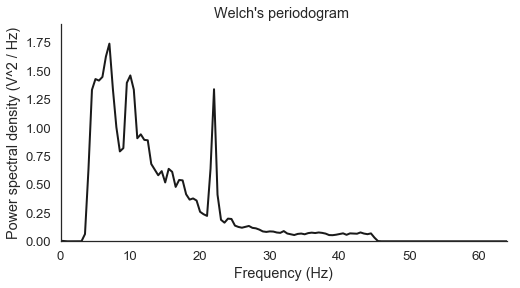

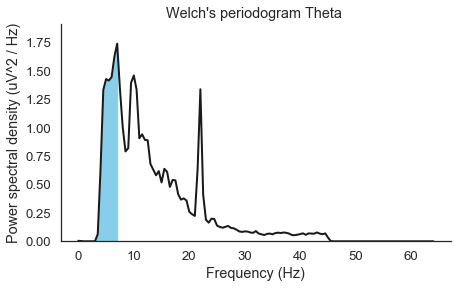

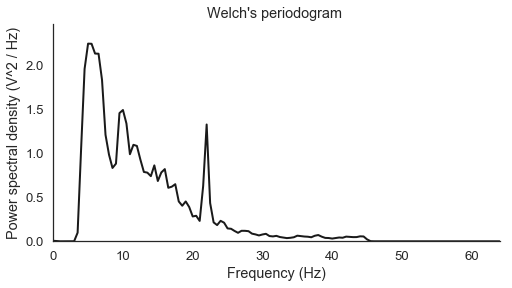

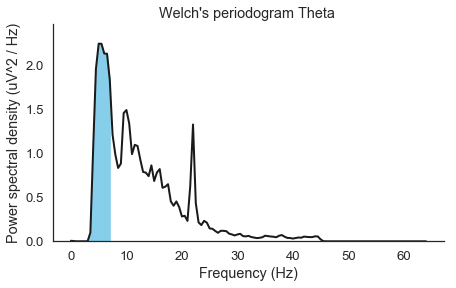

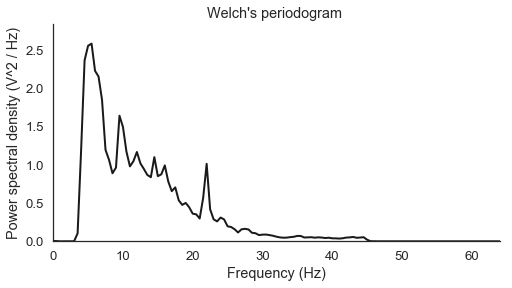

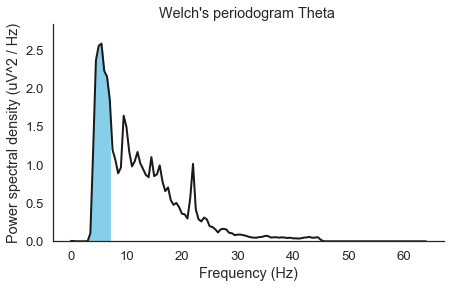

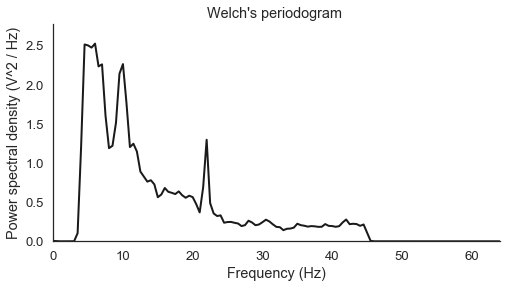

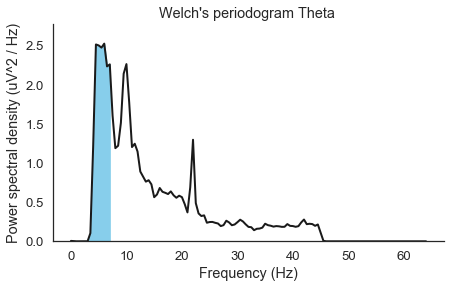

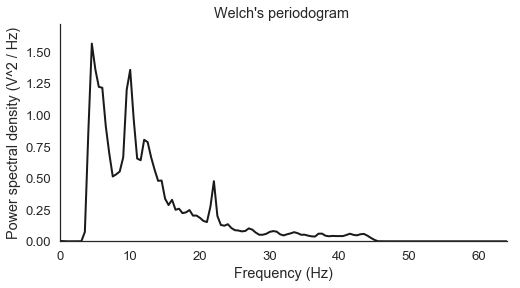

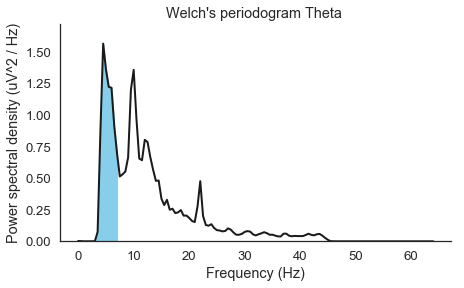

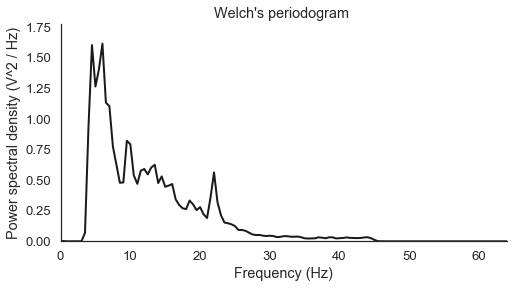

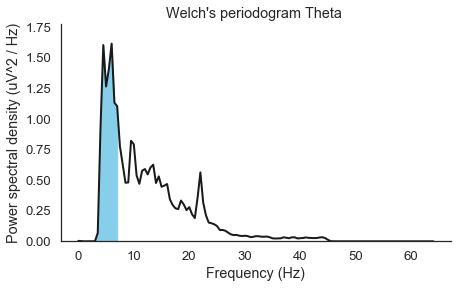

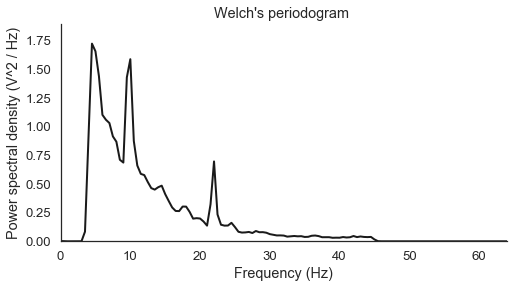

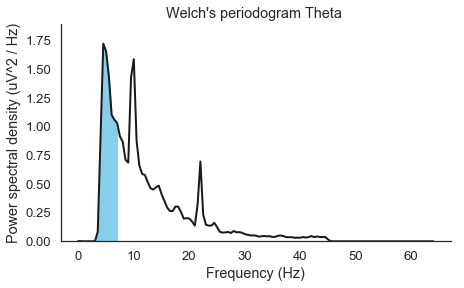

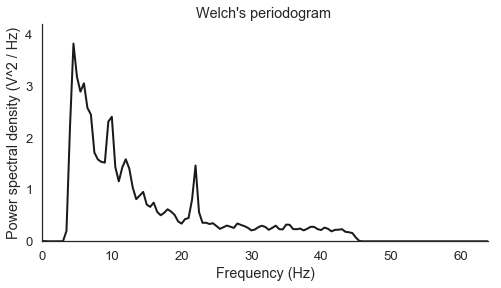

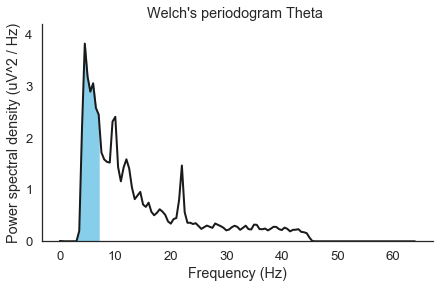

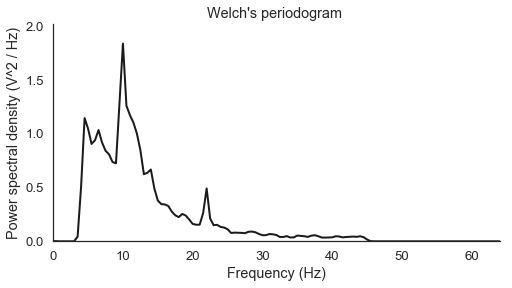

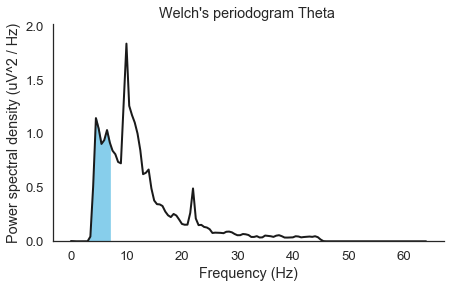

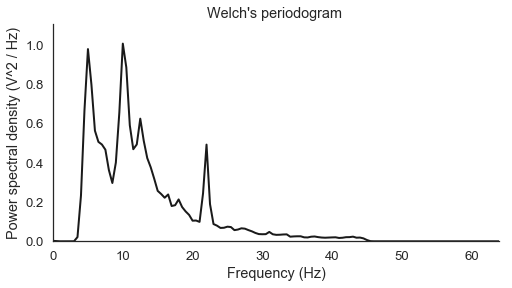

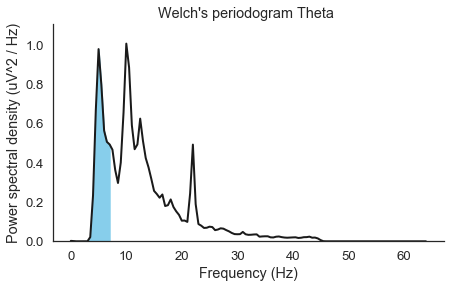

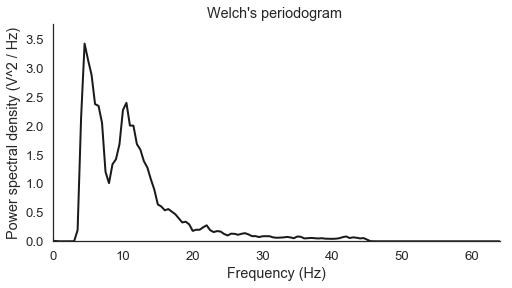

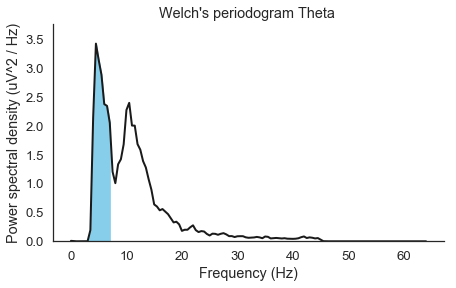

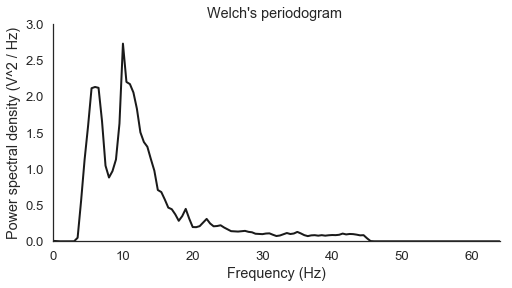

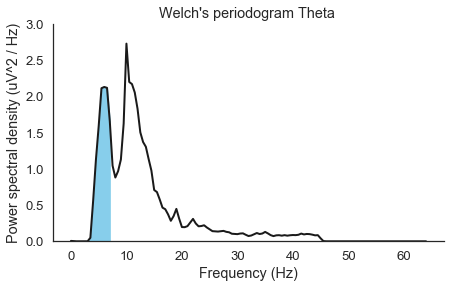

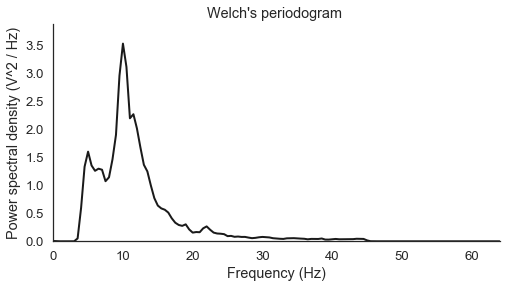

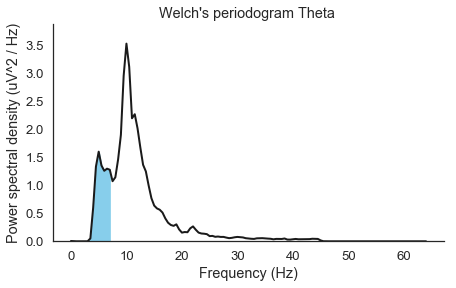

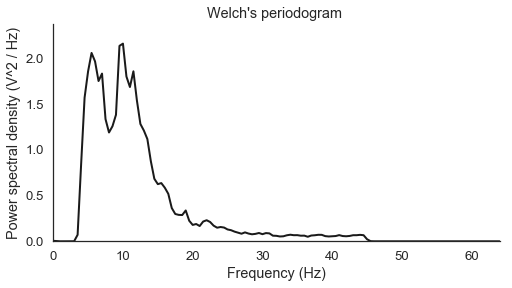

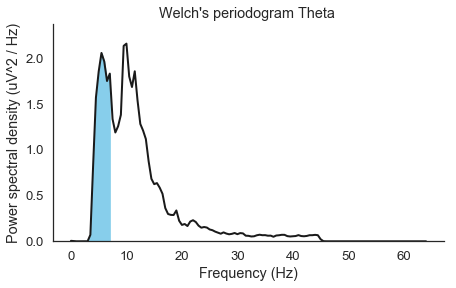

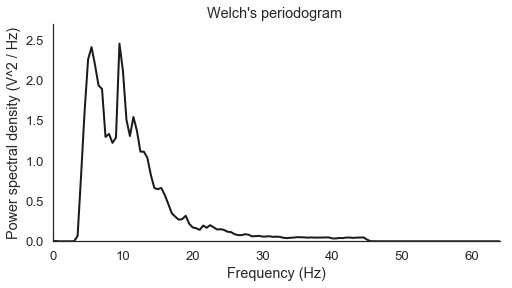

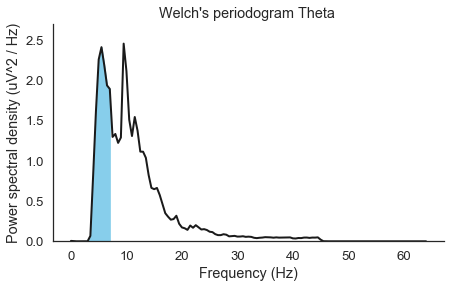

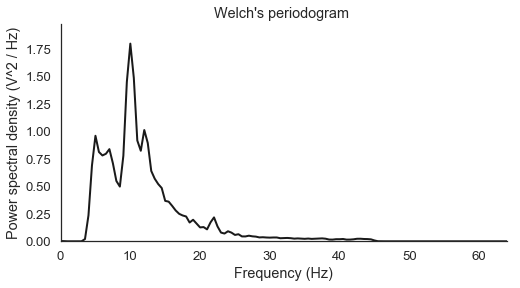

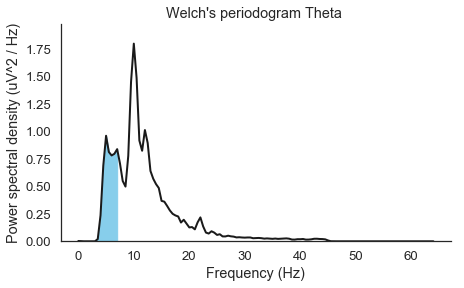

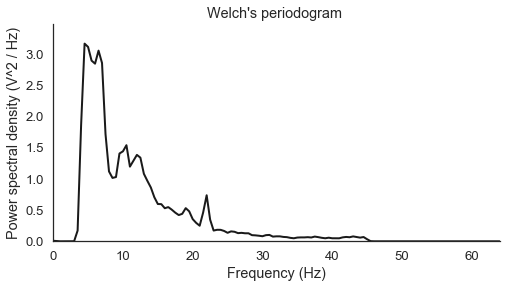

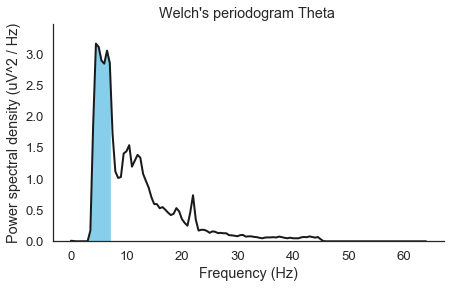

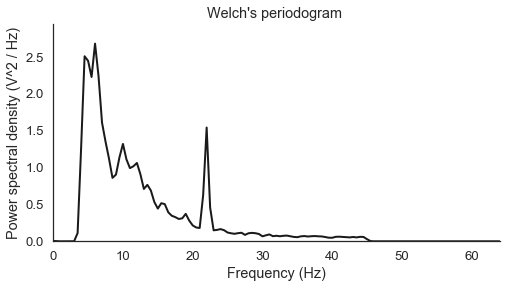

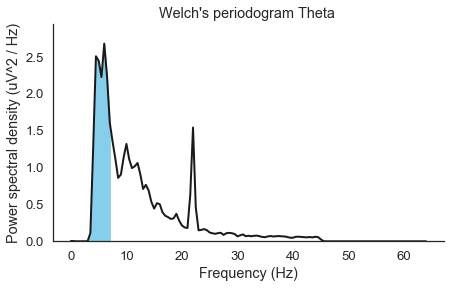

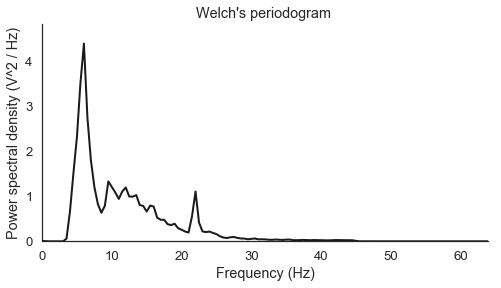

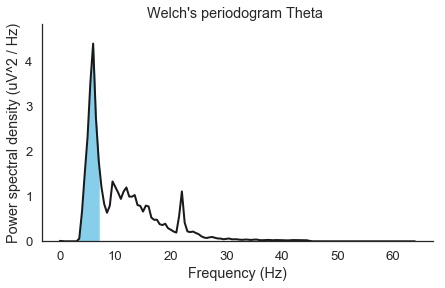

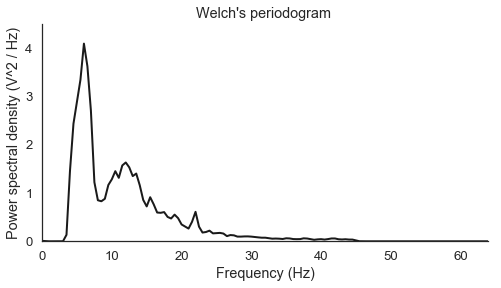

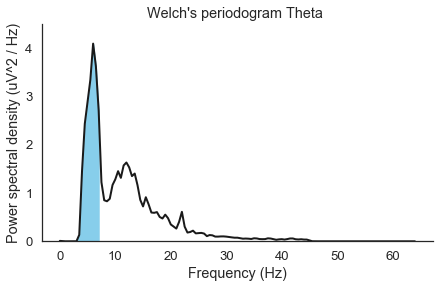

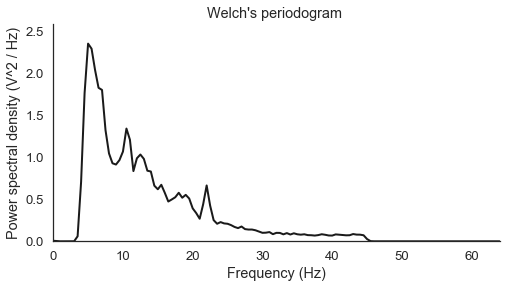

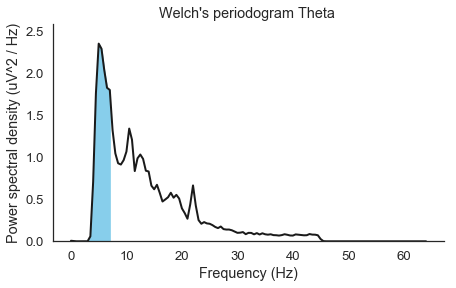

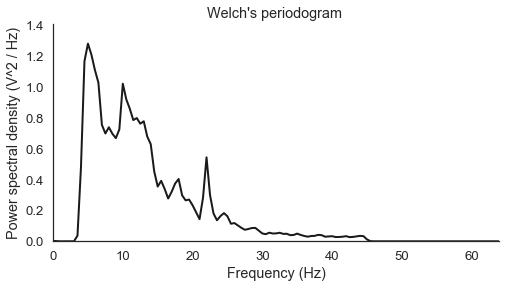

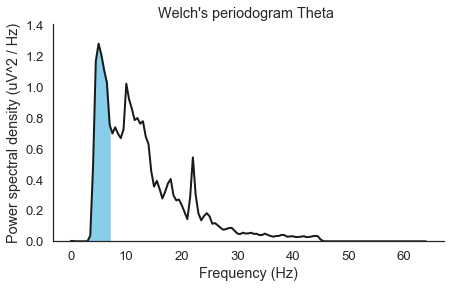

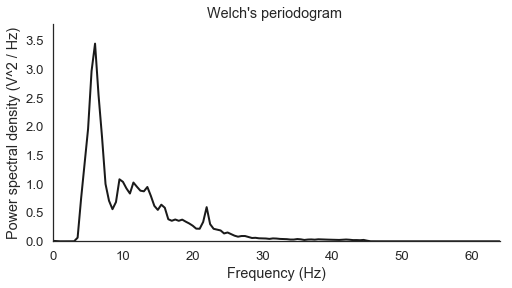

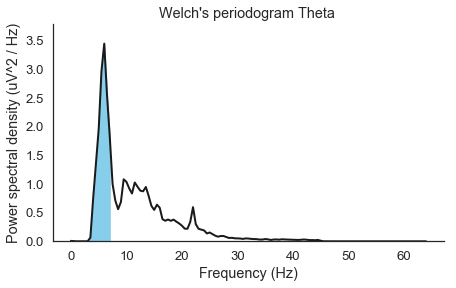

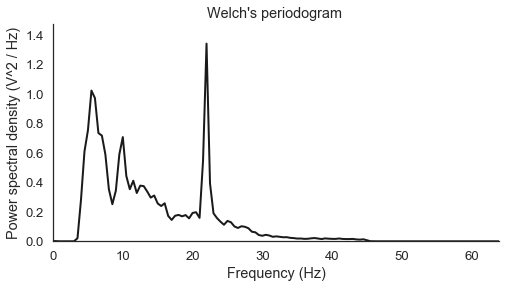

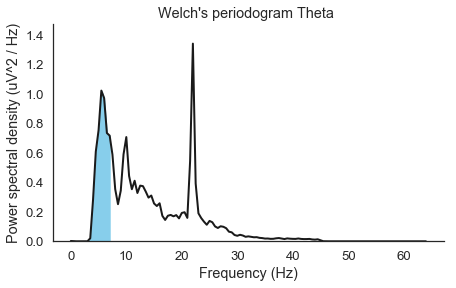

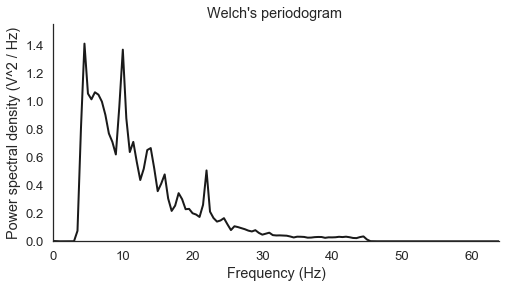

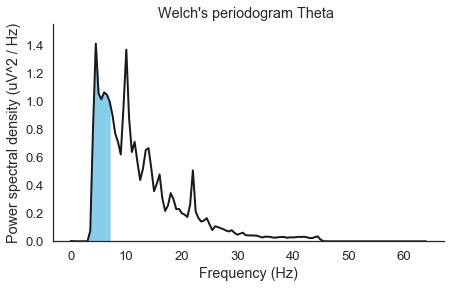

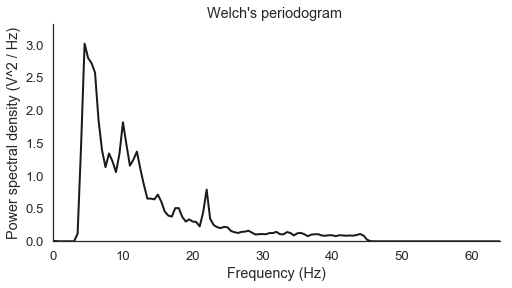

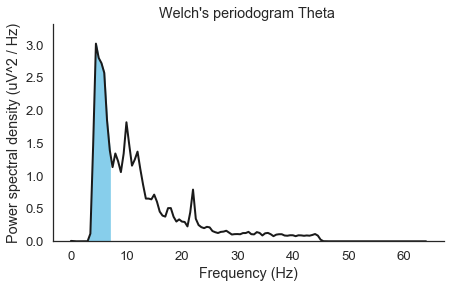

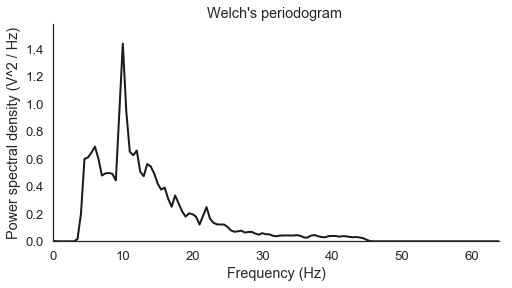

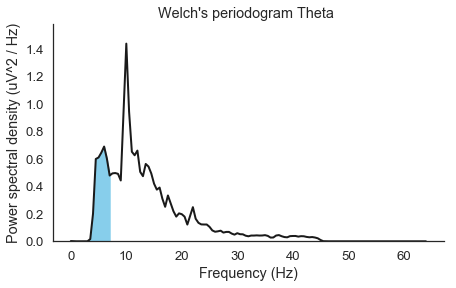

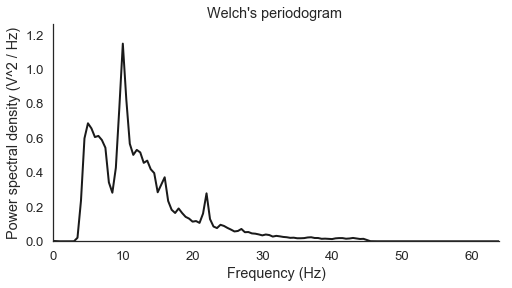

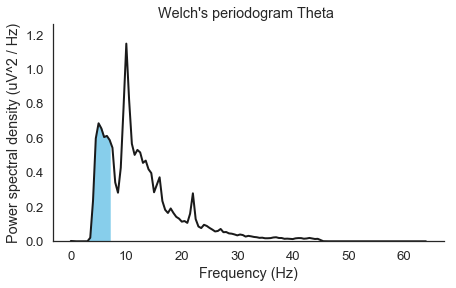

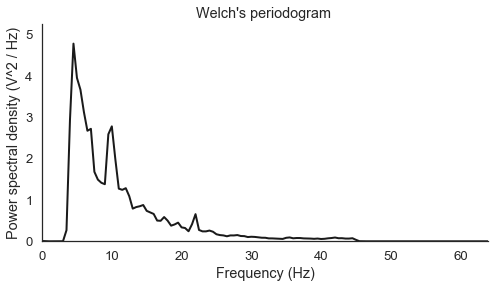

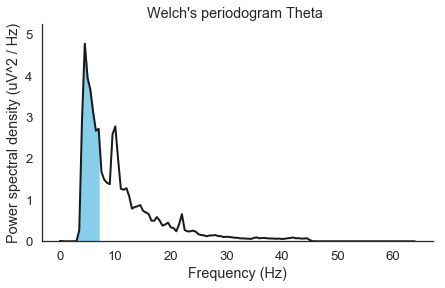

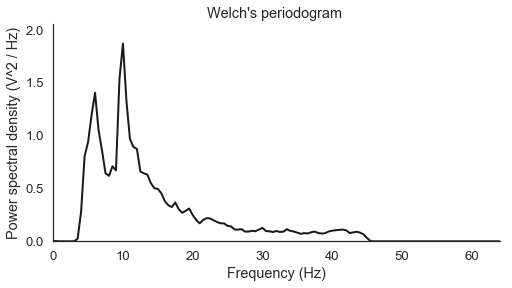

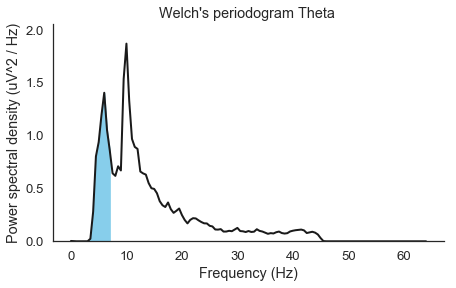

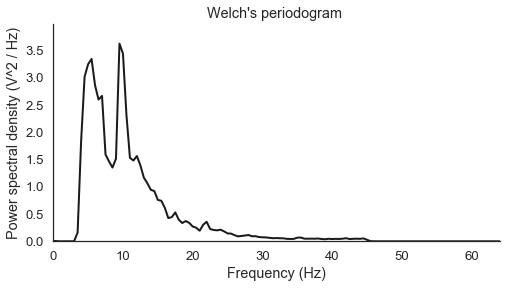

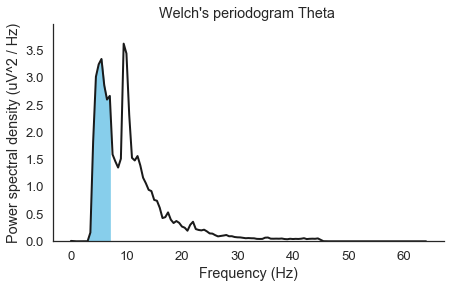

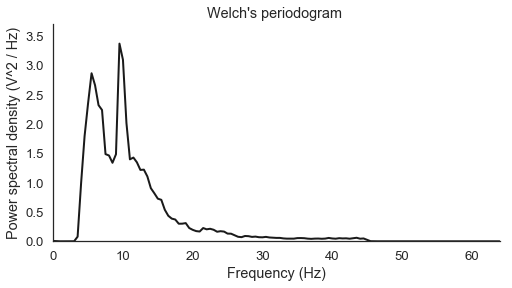

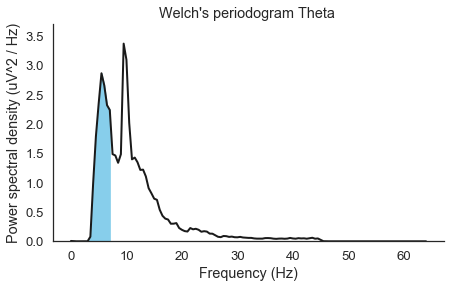

In [7]:
if __name__ == "__main__":
    ExtractTrialByUserAndPeriod(1,"s01",256)
    #ExtractAllUsersByPeriodAndWindow(256,30,35)
    #print(ExtractAllTrialsByUserAndPeriod("s01",256))



    #CheckCorrelation("s01",Array,"Arousal")